Vader: 
*   This uses a "bag of words" approach:
*   Stop words are removed
*   Each word is scored and combined to a total score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk
nltk.download('vader_lexicon')

# Read in the data
df = pd.read_csv('/Users/willjohnston/Documents/GitHub/Covid-and-Reddit/VaderRobertaSentimentComparison/Datasets/PostCovidMentalHealthRedditData.csv')
df = df.reset_index().rename(columns={'index': 'ID'})

print(df.shape)
df = df.head(500)
print(df.shape)

df.head()

(328, 9)
(328, 9)


[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


,ID,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,mentalhealth,To the man who saved my life and never knew,"On a rainy March day, 4 years ago, my parents ...",This pulled my heart strings. Im so happy this...,1928,50,2020-05-10 01:22:25,ggs39f
1,1,mentalhealth,i’m 365 days clean from selfharm baby,it’s a whole fucking year! right now everythin...,"Hell yeah you are! Kick ass news, I’m proud of...",1719,60,2020-07-08 11:54:55,hnfpr6
2,2,mentalhealth,Want an emotional support animal but can't hav...,"I'm a 35m, a grown ass man that has been to Ir...",As a fellow adult male w mental health struggl...,1551,88,2020-08-30 16:28:10,ijfhtt
3,3,mentalhealth,There is an Arabic saying and it goes like this:,“You want to die? Then throw yourself into the...,"I know it's besides the point, but I speak Ara...",1486,24,2020-01-13 13:18:17,eo3zu0
4,4,mentalhealth,Does anyone else have random thoughts pop in y...,"Can’t focus, I’m getting hot and cold really f...",I have that all the time. Things will haunt me...,1231,65,2020-11-25 22:42:52,k12sgp


In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [3]:
# Run the polarity score on the entire dataset
resTitle = {}
resContent = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    title = str(row['Title'])
    content = str(row['Content'])
    
    resTitle[i] = sia.polarity_scores(title)
    resContent[i] = sia.polarity_scores(content)

  0%|          | 0/328 [00:00<?, ?it/s]

In [4]:
vadersTitle = pd.DataFrame(resTitle).T
vadersTitle = vadersTitle.reset_index().rename(columns={'index': 'ID'})
vadersTitle = vadersTitle.merge(df, on='ID', how='left')
vadersTitle.head()

,ID,neg,neu,pos,compound,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,0.000,0.763,0.237,0.4215,mentalhealth,To the man who saved my life and never knew,"On a rainy March day, 4 years ago, my parents ...",This pulled my heart strings. Im so happy this...,1928,50,2020-05-10 01:22:25,ggs39f
1,1,0.000,0.690,0.310,0.4019,mentalhealth,i’m 365 days clean from selfharm baby,it’s a whole fucking year! right now everythin...,"Hell yeah you are! Kick ass news, I’m proud of...",1719,60,2020-07-08 11:54:55,hnfpr6
2,2,0.000,0.677,0.323,0.3182,mentalhealth,Want an emotional support animal but can't hav...,"I'm a 35m, a grown ass man that has been to Ir...",As a fellow adult male w mental health struggl...,1551,88,2020-08-30 16:28:10,ijfhtt
3,3,0.000,0.783,0.217,0.3612,mentalhealth,There is an Arabic saying and it goes like this:,“You want to die? Then throw yourself into the...,"I know it's besides the point, but I speak Ara...",1486,24,2020-01-13 13:18:17,eo3zu0
4,4,0.172,0.753,0.075,-0.4939,mentalhealth,Does anyone else have random thoughts pop in y...,"Can’t focus, I’m getting hot and cold really f...",I have that all the time. Things will haunt me...,1231,65,2020-11-25 22:42:52,k12sgp


In [5]:
vadersContent = pd.DataFrame(resContent).T
vadersContent = vadersContent.reset_index().rename(columns={'index': 'ID'})
vadersContent = vadersContent.merge(df, on='ID', how='left')
vadersContent.head()

,ID,neg,neu,pos,compound,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,0.093,0.833,0.073,-0.9425,mentalhealth,To the man who saved my life and never knew,"On a rainy March day, 4 years ago, my parents ...",This pulled my heart strings. Im so happy this...,1928,50,2020-05-10 01:22:25,ggs39f
1,1,0.121,0.651,0.227,0.4199,mentalhealth,i’m 365 days clean from selfharm baby,it’s a whole fucking year! right now everythin...,"Hell yeah you are! Kick ass news, I’m proud of...",1719,60,2020-07-08 11:54:55,hnfpr6
2,2,0.215,0.709,0.076,-0.9538,mentalhealth,Want an emotional support animal but can't hav...,"I'm a 35m, a grown ass man that has been to Ir...",As a fellow adult male w mental health struggl...,1551,88,2020-08-30 16:28:10,ijfhtt
3,3,0.146,0.594,0.260,0.4545,mentalhealth,There is an Arabic saying and it goes like this:,“You want to die? Then throw yourself into the...,"I know it's besides the point, but I speak Ara...",1486,24,2020-01-13 13:18:17,eo3zu0
4,4,0.019,0.789,0.192,0.9513,mentalhealth,Does anyone else have random thoughts pop in y...,"Can’t focus, I’m getting hot and cold really f...",I have that all the time. Things will haunt me...,1231,65,2020-11-25 22:42:52,k12sgp


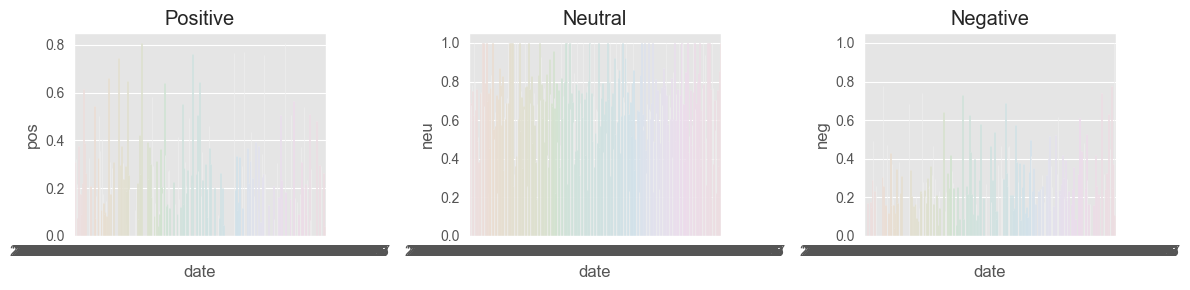

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vadersTitle, x='date', y='pos', ax=axs[0])
sns.barplot(data=vadersTitle, x='date', y='neu', ax=axs[1])
sns.barplot(data=vadersTitle, x='date', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

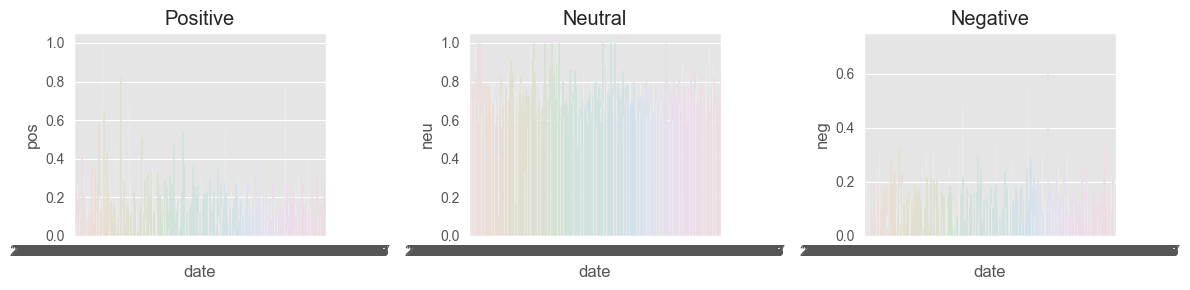

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vadersContent, x='date', y='pos', ax=axs[0])
sns.barplot(data=vadersContent, x='date', y='neu', ax=axs[1])
sns.barplot(data=vadersContent, x='date', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Huggingface Roberta Transformers: https://huggingface.co/docs/transformers/model_doc/roberta

Roberta Pretrained Model:
*   A model trained from a large corpus of data.
*   Transformer model accounts for the words but also the context related to other words.



In [8]:
!pip install transformers

In [9]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [10]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [11]:
# Run for Roberta Model
robertaTitle = {}
robertaContent = {}
resTitle = {}
resContent = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        title = str(row['Title'])

        vader_title_result = sia.polarity_scores(title)
        vader_title_result_rename = {}

        for key, value in vader_title_result.items():
            vader_title_result_rename[f"vader_{key}"] = value
            
        roberta_title_result = polarity_scores_roberta(title)
        robertaTitle[i] = roberta_title_result
        resTitle[i] = {**vader_title_result_rename, **roberta_title_result}

    except RuntimeError:
        print(f'Broke for Title id {i}')

    try:
        content = str(row['Content'])

        vader_content_result = sia.polarity_scores(content)
        vader_content_result_rename = {}

        for key, value in vader_content_result.items():
            vader_content_result_rename[f"vader_{key}"] = value
            
        roberta_content_result = polarity_scores_roberta(content)
        robertaContent[i] = roberta_content_result
        resContent[i] = {**vader_content_result_rename, **roberta_content_result}

    except RuntimeError:
        print(f'Broke for Content id {i}')

  0%|          | 0/328 [00:00<?, ?it/s]

Broke for Content id 0
Broke for Content id 84
Broke for Content id 118
Broke for Content id 128
Broke for Content id 133
Broke for Content id 145
Broke for Content id 146
Broke for Content id 149
Broke for Content id 163
Broke for Content id 167
Broke for Content id 187
Broke for Content id 194
Broke for Content id 214
Broke for Content id 223
Broke for Content id 246
Broke for Content id 253
Broke for Content id 261
Broke for Content id 270
Broke for Content id 280
Broke for Content id 298
Broke for Content id 310


In [12]:
robertaTitleDF = pd.DataFrame(robertaTitle).T
robertaTitleDF = robertaTitleDF.reset_index().rename(columns={'index': 'ID'})
robertaTitleDF = robertaTitleDF.merge(df, on='ID', how='left')
robertaTitleDF.columns

Index(['ID', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

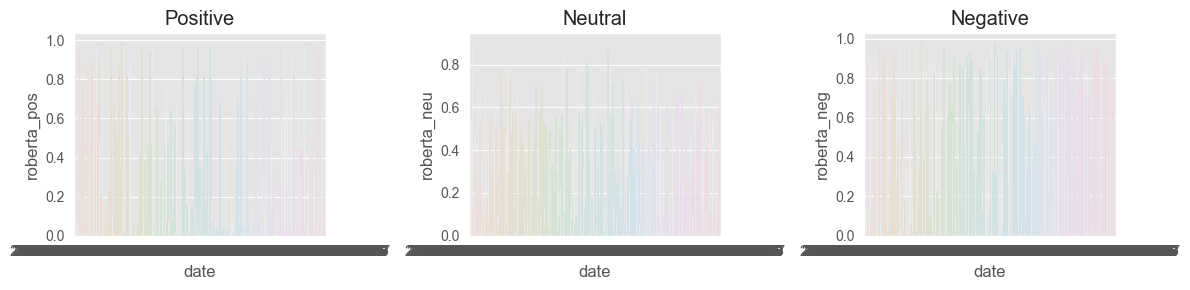

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=robertaTitleDF, x='date', y='roberta_pos', ax=axs[0])
sns.barplot(data=robertaTitleDF, x='date', y='roberta_neu', ax=axs[1])
sns.barplot(data=robertaTitleDF, x='date', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [14]:
robertaContentDF = pd.DataFrame(robertaContent).T
robertaContentDF = robertaContentDF.reset_index().rename(columns={'index': 'ID'})
robertaContentDF = robertaContentDF.merge(df, on='ID', how='left')
robertaContentDF.columns

Index(['ID', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

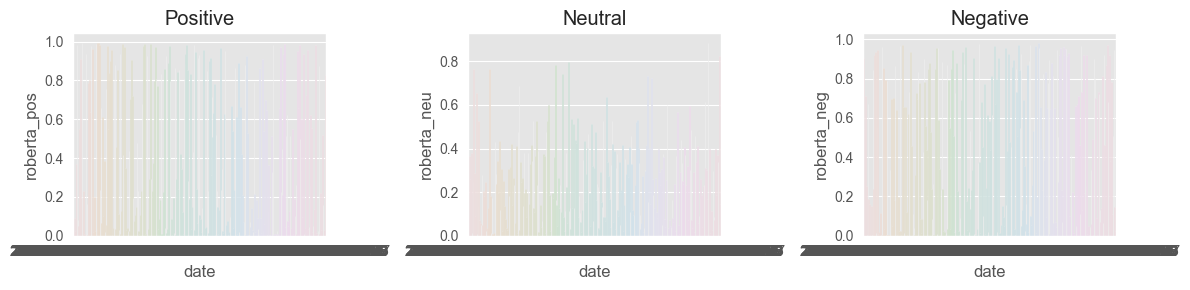

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=robertaContentDF, x='date', y='roberta_pos', ax=axs[0])
sns.barplot(data=robertaContentDF, x='date', y='roberta_neu', ax=axs[1])
sns.barplot(data=robertaContentDF, x='date', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [16]:
results_title_df = pd.DataFrame(resTitle).T
results_title_df = results_title_df.reset_index().rename(columns={'index': 'ID'})
results_title_df = results_title_df.merge(df, on='ID', how='left')
results_title_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

In [17]:
sns.pairplot(data=results_title_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='date',
            palette='tab10')
plt.show()

In [ ]:
results_content_df = pd.DataFrame(resContent).T
results_content_df = results_content_df.reset_index().rename(columns={'index': 'ID'})
results_content_df = results_content_df.merge(df, on='ID', how='left')
results_content_df.columns

In [ ]:
sns.pairplot(data=results_content_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='date',
            palette='tab10')
plt.show()